## Observations and Insights 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "../Data/Mouse_metadata.csv"
study_results_path = "../Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Change/clean the Tumor Volume(mm3) column to Tumor Volume
final_mouse_metadata_df = combined_data_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})

# Display the data table for preview
final_mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_grouped = final_mouse_metadata_df.groupby(['Drug Regimen'])


In [78]:
drug_regimen_grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [79]:
# Get mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_mean = drug_regimen_grouped['Tumor Volume'].mean()
drug_regimen_median = drug_regimen_grouped['Tumor Volume'].median()
drug_regimen_variance = drug_regimen_grouped['Tumor Volume'].var()
drug_regimen_std = drug_regimen_grouped['Tumor Volume'].std()
drug_regimen_sem = drug_regimen_grouped['Tumor Volume'].sem()

In [80]:
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({
    'Mean': drug_regimen_mean,
    'Median': drug_regimen_median,
    'Variance': drug_regimen_variance,
    'Standard Deviation': drug_regimen_std,
    'SEM': drug_regimen_sem
})

summary_stats.head(100)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

0 0.5 Data Points


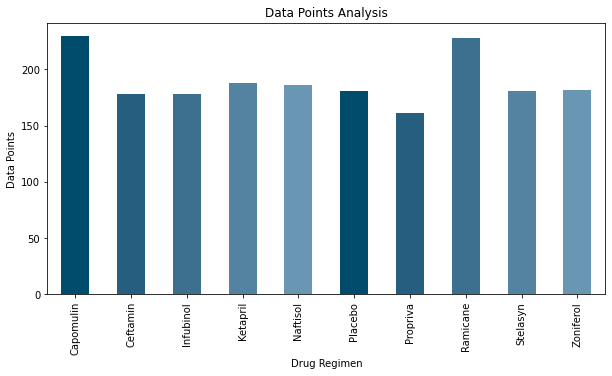

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_data_points = final_mouse_metadata_df.groupby(['Drug Regimen']).count()['Mouse ID']
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

drug_regimen_data_points.plot(kind='bar', figsize=(10,5), color=colors)

plt.title('Data Points Analysis')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')

print(0, 0.5, 'Data Points')

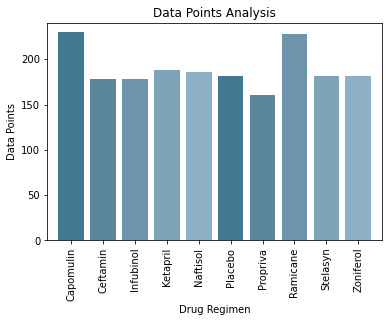

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(drug_regimen_data_points))

plt.bar(x_axis, users, color=colors, alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+10)

plt.title("Data Points Analysis")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()


In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
mouse_gender_df = pd.DataFrame(merge_table.groupby(['Sex']).count()).reset_index()

mouse_gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [84]:
mouse_gender_df = mouse_gender_df[["Sex","Mouse ID"]]
mouse_gender_df = mouse_gender_df.rename(columns={"Mouse ID": "Count"})

mouse_gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


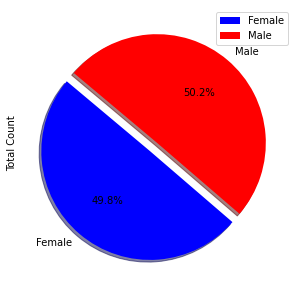

In [85]:
groupby_gender = final_mouse_metadata_df.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender_df = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())

mouse_gender_df.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

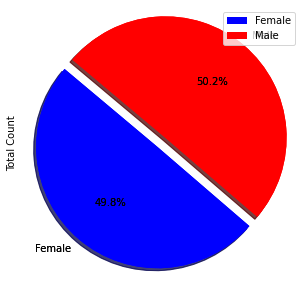

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.799197,50.200803]

colors = ['blue', 'red']

explode = (0.1, 0)

plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

best_regimes = final_mouse_metadata_df[final_mouse_metadata_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume"]]

best_regimes_data.head(100)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0
...,...,...,...,...
75,Ramicane,z578,0,45.0
1836,Ceftamin,y769,0,45.0
65,Ramicane,m546,0,45.0
20,Capomulin,x401,0,45.0


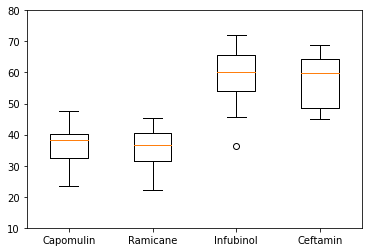

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume']
best_regimens_sort.head()

best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

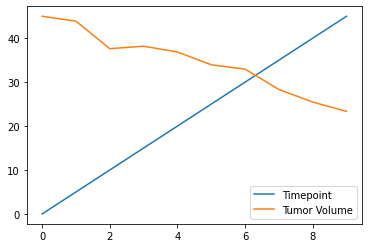

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vs_tumor = final_mouse_metadata_df[final_mouse_metadata_df["Mouse ID"].isin(["s185"])]

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume"]]

line_plot_df = time_vs_tumor_data.reset_index()

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume"]]

lines = line_plot_final.plot.line()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter = final_mouse_metadata_df[final_mouse_metadata_df['Drug Regimen'].isin(['Capomulin'])]

capomulin_scatter_df = best_regimes[['Mouse ID', 'Weight (g)', 'Tumor Volume']]

capomulin_sorted = capomulin_scatter_plot.sort_values(['Weight (g)'], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()


capomulin_grouped_weight = capomulin_scatter_plot.groupby('Weight (g)')['Tumor Volume'].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume', grid = True, figsize= (8,8))

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=10,color="red")

plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")

plt.show()